In [176]:
# from nltk.classify import NaiveBayesClassifier
# from nltk.corpus import subjectivity
# from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize

#import pandas as pd
import numpy as np
import polars as pl
from matplotlib import pyplot as plt

from datetime import datetime
import matplotlib.dates as mdates
import importlib
import plotly.express as px
import base64

#from src.utils.keywords import get_event_metadata
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS
import io
from PIL import Image

from src.utils.analysis_tools import *
from leos_functions import *

from src.utils import keywords
from src.utils import analysis_tools
from src.scripts import filters

In [26]:
path_final_yt_metadata = 'data/matching_videos.csv'
meta_data_df = pl.read_csv(path_final_yt_metadata, separator=",")
path_final_time = 'data/df_timeseries_en.tsv'
time_df = pl.read_csv(path_final_time, separator="\t")
path_channel = 'data/df_channels_en.tsv'
channel_df = pl.read_csv(path_channel, separator="\t")

meta_data_df.head(1)
time_df.head(1)
channel_df.head(1)


ComputeError: could not parse `fDZHDuozuqU` as dtype `f64` at column 'dislike_count' (column number 5)

The current offset in the file is 19012 bytes.

You might want to try:
- increasing `infer_schema_length` (e.g. `infer_schema_length=10000`),
- specifying correct dtype with the `schema_overrides` argument
- setting `ignore_errors` to `True`,
- adding `fDZHDuozuqU` to the `null_values` list.

Original error: ```remaining bytes non-empty```

In [5]:
def vader_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    score = sia.polarity_scores(text)['compound']
    return score


In [56]:
meta_data_df["sentiment"] = meta_data_df["title"].apply(vader_sentiment)
meta_data_df.to_csv('matching_videos_sentimet.csv')
meta_data_df.head(1)

categories                channel_id                  crawl_date  \
0  People & Blogs  UCzF4Ryn8TKn64md77gS5Q5Q  2019-11-04 21:11:23.560250   

                                         description dislike_count  \
0  There has been a lot of emotional reaction to ...           0.0   

    display_id duration like_count           tags  \
0  BFlU3b68aNs       60        3.0  politics,news   

                                               title          upload_date  \
0  Online reaction swift after Georgia House pass...  2019-03-29 00:00:00   

   view_count  sentiment  
0       401.0     0.2023

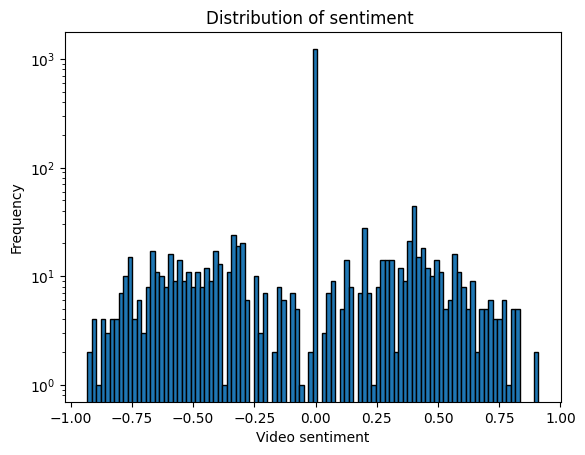

In [9]:
plt.hist(meta_data_df["sentiment"], bins= 100, edgecolor='black')
plt.xlabel('Video sentiment')
plt.ylabel('Frequency')
plt.title('Distribution of sentiment ')
plt.yscale('log')
plt.show()

In [11]:
news_time_df = time_df[time_df['category'] == "News & Politics"]
news_time_df.head(1)


In [13]:
news_time_df['datetime'] = pd.to_datetime(news_time_df['datetime'])
news_time_df['year_month'] = news_time_df['datetime'].dt.to_period('M')
monthly_views = news_time_df.groupby('year_month')['delta_views'].sum()
print(monthly_views.head(1))

year_month
2015-10    133166.103627
Freq: M, Name: delta_views, dtype: float64


C:\Users\leoga\AppData\Local\Temp\ipykernel_35140\3894126653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_time_df['datetime'] = pd.to_datetime(news_time_df['datetime'])
C:\Users\leoga\AppData\Local\Temp\ipykernel_35140\3894126653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_time_df['year_month'] = news_time_df['datetime'].dt.to_period('M')


Text(0, 0.5, 'delta Views')

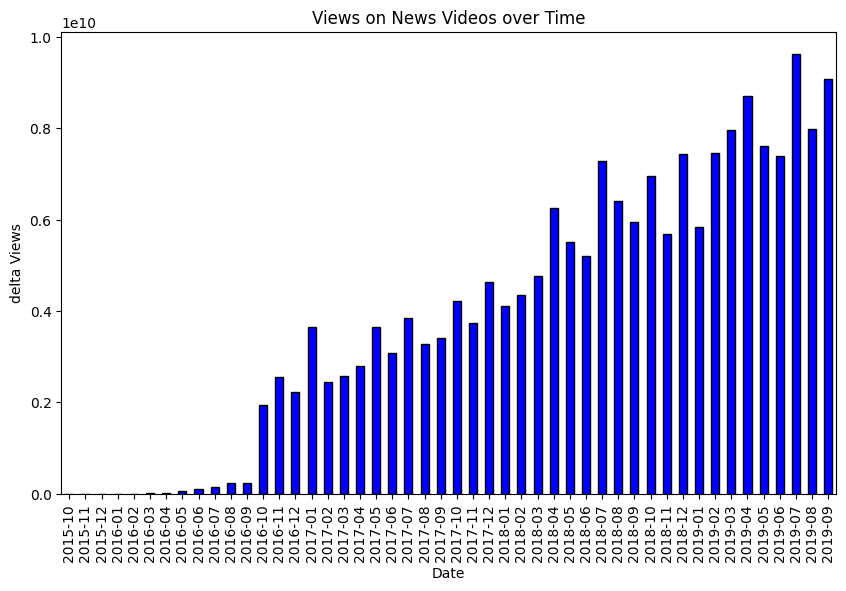

In [14]:
plt.figure(figsize=(12, 6))  # Set the figure size
# plt.plot(monthly_views.index, monthly_views.values, linestyle='-', color='b')
monthly_views.plot(kind='bar', figsize=(10, 6), color='b', edgecolor='black')
# Customize the plot
plt.title('Views on News Videos over Time')
plt.xlabel('Date')
plt.ylabel('delta Views')


category_cc   join_date                   channel    name_cc  \
0      Gaming  2010-04-29  UC-lHJZR3Gqxm24_Vd_AJ5Yw  PewDiePie   

   subscribers_cc  videos_cc  subscriber_rank_sb  weights  
0       101000000       3956                 3.0    2.087

In [133]:
path_paper = 'data/paper_results.csv'
paper = pd.read_csv(path_paper, sep=";")
paper = paper.head(15) #cut off the total collumn


In [138]:
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=('YouTube videos uploaded by category',  'YouTube videos viewed by category'), 
                    specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie(
        values=paper["videos"], 
        labels=paper["category"]  
    ),
    row=1, col=1
)

fig.add_trace(
    go.Pie(
        values=paper["views"], 
        labels=paper["category"] 
    ),
    row=1, col=2
)

fig.show()
fig.write_html("src/plots/intro_pie.html")

In [105]:
path_final= 'data/final_classified_filtered_dataset.csv'
final_df = pl.read_csv(path_final, separator=",")
test= final_df.head(1)
len(final_df)

11061

In [106]:
final_df.head(1)
pd_final = final_df.to_pandas()


In [158]:
# all
plot_word_cloud(pd_final["title"], "fig0", "over all videos")  #all    
plot_word_cloud(pd_final[pd_final["region"] == "US"]["title"], "fig1", "all videos in the US")  #US
plot_word_cloud(pd_final[pd_final["region"] == "Asia"]["title"], "fig2", "all videos in Asia")  #Asia   
plot_word_cloud(pd_final[pd_final["region"] == "Europe"]["title"], "fig3", "all videos in Europe")  #Europa
# natural
plot_word_cloud(pd_final[pd_final["event_type"] == "environmental"]["title"], "fig4","natural disasters" )
plot_word_cloud(pd_final[pd_final["event_type"] == "environmental"][pd_final["region"] == "US"]["title"], "fig5", "natural disasters in the US")
plot_word_cloud(pd_final[pd_final["event_type"] == "environmental"][pd_final["region"] == "Asia"]["title"], "fig6", "natural disasters in Asia")
plot_word_cloud(pd_final[pd_final["event_type"] == "environmental"][pd_final["region"] == "Europe"]["title"], "fig7" , "natural disasters in Europe")
# geoplitical
plot_word_cloud(pd_final[pd_final["event_type"] == "geopolitical"]["title"], "fig8", "geoplitical conflicts")
plot_word_cloud(pd_final[pd_final["event_type"] == "geopolitical"][pd_final["region"] == "US"]["title"], "fig9", "geoplitical conflicts US")
plot_word_cloud(pd_final[pd_final["event_type"] == "geopolitical"][pd_final["region"] == "Asia"]["title"], "fig10", "geoplitical conflicts Asia")
plot_word_cloud(pd_final[pd_final["event_type"] == "geopolitical"][pd_final["region"] == "Europe"]["title"], "fig11", "geoplitical conflicts Europe")

C:\Users\leoga\AppData\Local\Temp\ipykernel_45552\2040732383.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\leoga\AppData\Local\Temp\ipykernel_45552\2040732383.py:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\leoga\AppData\Local\Temp\ipykernel_45552\2040732383.py:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\leoga\AppData\Local\Temp\ipykernel_45552\2040732383.py:13: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\leoga\AppData\Local\Temp\ipykernel_45552\2040732383.py:14: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\leoga\AppData\Local\Temp\ipykernel_45552\2040732383.py:15: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [192]:
def interactive_images(path, labels, images):
    """
    generates a interactive plot that spitches between images based on a dropdown menue 

    Inputs:
        path (str): path to where it saves the html
        lables (list of str): drop down labels
        images (list of images): the images to be ploted

    """
    fig = go.Figure()

    image_dict = {
        'sizex': 10,
        'sizey': 5,
        'x': -1,
        'y': 4,
        'xref': 'x',
        'yref': 'y',
        'opacity': 1.0,
        'layer': 'below',
    }
    
    labels.append("select videos here")
    nb_buttons= len(labels)


    # default
    fig.update_layout(
        images=[
            dict(
                **image_dict,
                source=images[0],  
            )
        ],             
    )

    dropdown_event = [
        dict(
            label=labels[i],
            method="relayout",
            args=[
                {
                    "images": [
                        dict(
                            **image_dict,
                            source = None if i == 12 else images[i],  
                        )
                    ],
                }
            ],
        )
        for i in range(nb_buttons)
    ]

    axis = dict(
            showgrid=False,
            zeroline=False,
            showticklabels=False,
            visible=False,
        )

    fig.update_layout(
        updatemenus=[
            dict(
                buttons=dropdown_event,
                direction="down",
                showactive=True,
                x=0,
                y=1.2,
                xanchor="left",
                yanchor="top",
            ),
        ],
        width=800,
        height=500,
        plot_bgcolor="white",
        margin=dict(l=20, r=20, t=20, b=20),
        xaxis=axis,
        yaxis=axis,
    )
    fig.show()
    fig.write_html(path)

In [193]:
from leos_functions import *
images = [
    encode_image(f"img/wordclouds/fig{i}") for i in range(12)
]

label_event = ["over all videos", "all videos in the US", "all videos in Asia", "all videos in Europe", 
                "natural disasters", "natural disasters in the US", "natural disasters in Asia", "natural disasters in Europe", 
                "geoplitical conflicts", "geoplitical conflicts US", "geoplitical conflicts Asia", "geoplitical conflicts Europe"]
    

interactive_images("hello.html", label_event, images)



NameError: name 'interactive_images' is not defined

In [24]:
sub_df= add_subjectivity(final_df)
sub_df.write_csv('videos_subjectivity.csv')


In [25]:
print(sub_df)


shape: (11_061, 16)
┌────────────┬────────────┬───────────┬───────────┬───┬───────────┬────────┬───────────┬───────────┐
│ categories ┆ channel_id ┆ crawl_dat ┆ descripti ┆ … ┆ event     ┆ region ┆ event_typ ┆ subjectiv │
│ ---        ┆ ---        ┆ e         ┆ on        ┆   ┆ ---       ┆ ---    ┆ e         ┆ ity       │
│ str        ┆ str        ┆ ---       ┆ ---       ┆   ┆ str       ┆ str    ┆ ---       ┆ ---       │
│            ┆            ┆ str       ┆ str       ┆   ┆           ┆        ┆ str       ┆ str       │
╞════════════╪════════════╪═══════════╪═══════════╪═══╪═══════════╪════════╪═══════════╪═══════════╡
│ News &     ┆ UCruQg25yV ┆ 2019-10-3 ┆ The       ┆ … ┆ Hurricane ┆ US     ┆ environme ┆ 0         │
│ Politics   ┆ BppUWjza8A ┆ 0 19:40:1 ┆ Southern  ┆   ┆ Harvey    ┆        ┆ ntal      ┆           │
│            ┆ lyZA       ┆ 8.042891  ┆ Baptist   ┆   ┆ (2017)    ┆        ┆           ┆           │
│            ┆            ┆           ┆ Conventio ┆   ┆           ┆    